Here tripsUnique instead of trips to get the deduplicated trips. There is an interesting phenomenon where there seem to be duplicate trips being recorded. It is possible that this is originating from OneBusAway itself.  It seems that the information provided by OneBusAway is not meant to be extremely reliable, however we will still see what information we can glean.

In [2]:
def queryTripsMinMax(dbPath, minRow, maxRow):
	import sqlite3

	db = sqlite3.connect(dbPath)
	cursor = db.cursor()

	cursor.execute('''SELECT startTime, bridgeName, direction, simpleMPH FROM tripsUnique WHERE rowid > ? AND rowid < ?''', (minRow,maxRow))
	result = cursor.fetchall()

	db.close()
	return result

In [3]:
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
%matplotlib inline


In [4]:
style.use('seaborn-ticks')

In [105]:
cbColors = [ [230,159,0], [86,180,233], [0,158,115], [240,228,66], [0,114,178],  [213,94,0], [204,121,167], [0,0,0],]
for rgbList in cbColors:
    rgbList[:] = [x / 255 for x in rgbList]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cbColors)

In [6]:
DB_PATH = 'archives/mydb_Aug13_Final'
rows = queryTripsMinMax(DB_PATH, 1, 23000) #Grab all rows, we already know there are about 22k rows

In [8]:
formattedRows = [[dt.datetime.fromtimestamp(int(list[0])), list[1], list[2], float(list[3])]  for list in rows]
df = pd.DataFrame(formattedRows, columns=['datetime','highway','direction','simpleMPH'])

In [9]:
print(df.head())

             datetime highway direction  simpleMPH
0 2017-08-09 19:06:37   SR520         W   3.271172
1 2017-07-25 08:03:46   SR520         W   3.923153
2 2017-07-26 16:31:17   SR520         W   5.026417
3 2017-07-26 16:37:17   SR520         W   5.026417
4 2017-07-26 15:32:18     I90         W   5.182196


In [11]:
df = df.loc[df['simpleMPH'] <= 75] #Remove spurious data
df = df.sort('datetime')
df['date'] = df['datetime'].apply(lambda x: x.date)
from pandas import date_range, to_datetime
df['timeofdaysec'] = df['datetime'].apply(lambda x: (to_datetime(x) -to_datetime(x.date())).total_seconds())
#print(df_WI90['timeofdaysec'])

In [77]:
df_WI90 = df.loc[(df['highway'] == 'I90') & (df['direction'] == 'W')]
df_EI90 = df.loc[(df['highway'] == 'I90') & (df['direction'] == 'E')]
df_WSR520 = df.loc[(df['highway'] == 'SR520') & (df['direction'] == 'W')]
df_ESR520 = df.loc[(df['highway'] == 'SR520') & (df['direction'] == 'E')]

This is an overview of all our data. Here we can see the closure of the I-90 bridge for the Blue Angels from 8/3-8/6 and that there was no data collected on 8/2 in order to move the recording computer to a new location.

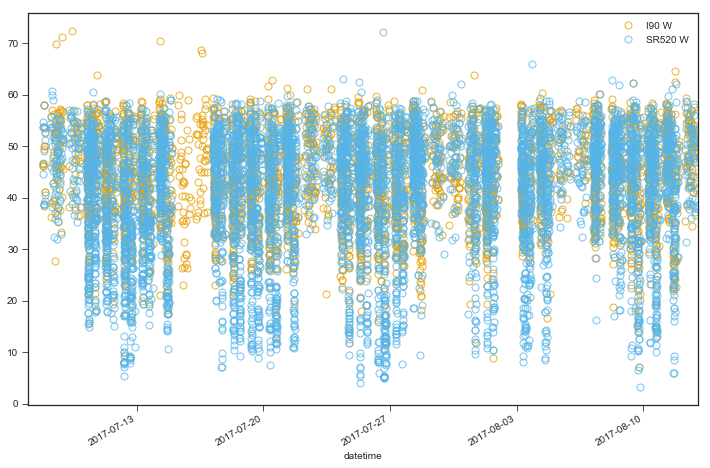

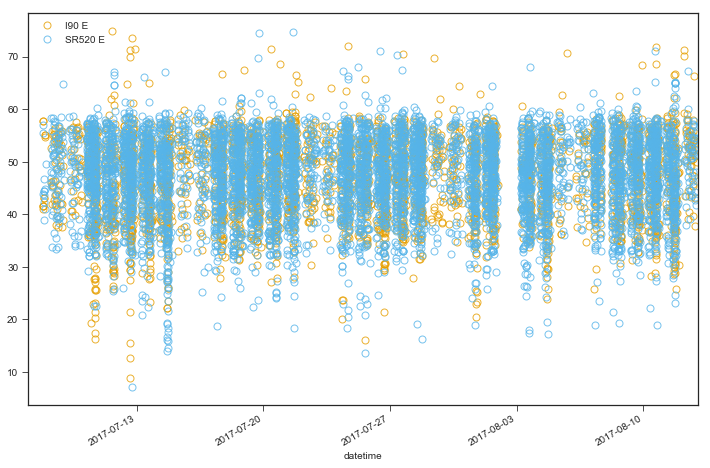

In [111]:
kwargs = {'lw':0, 'marker':'o', 'markersize':7, 'alpha':.8, 'mfc':'none'}
day=19
month=7
start=dt.date(2017,7,7)
end=dt.date(2017,8,13)
fig,ax = plt.subplots(figsize=(12,8))
df_WI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 W', **kwargs)
df_WSR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 W', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 W', 'SR520 W'])

fig,ax = plt.subplots(figsize=(12,8))
df_EI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 E', **kwargs)
df_ESR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 E', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 E', 'SR520 E'])

Here we can look at specific days:

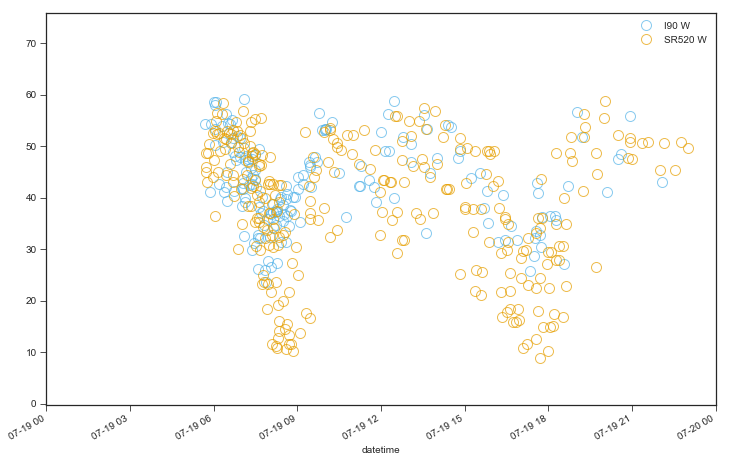

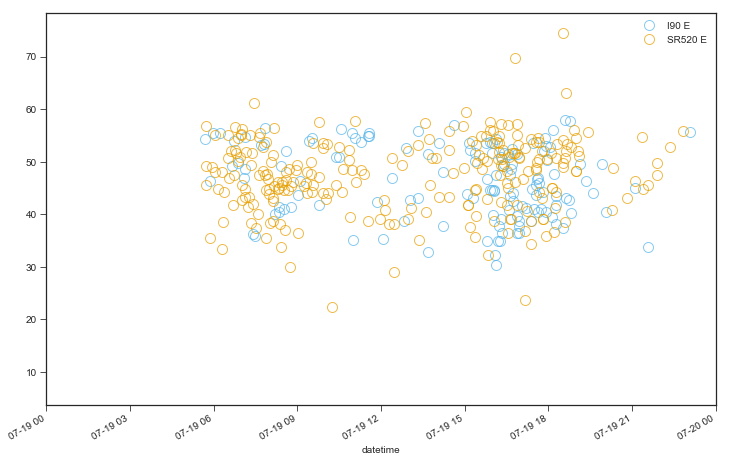

In [101]:
day=19
month=7

kwargs = {'lw':0, 'marker':'o', 'markersize':10, 'alpha':.7, 'mfc':'none'}
start=dt.date(2017,month,day)
end=dt.date(2017,month,day+1)
fig,ax = plt.subplots(figsize=(12,8))
df_WI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 W', **kwargs)
df_WSR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 W', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 W', 'SR520 W'])

fig,ax = plt.subplots(figsize=(12,8))
df_EI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 E', **kwargs)
df_ESR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 E', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 E', 'SR520 E'])

And here we can see a week of data. Note that we can pick out the weekends easily by looking for the lack of traffic.

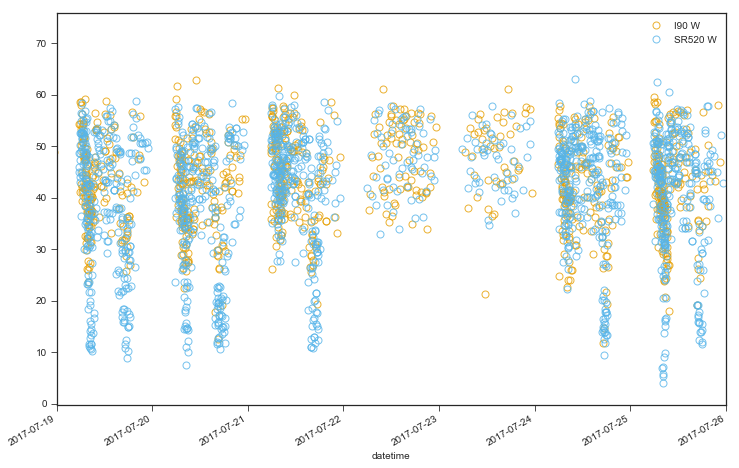

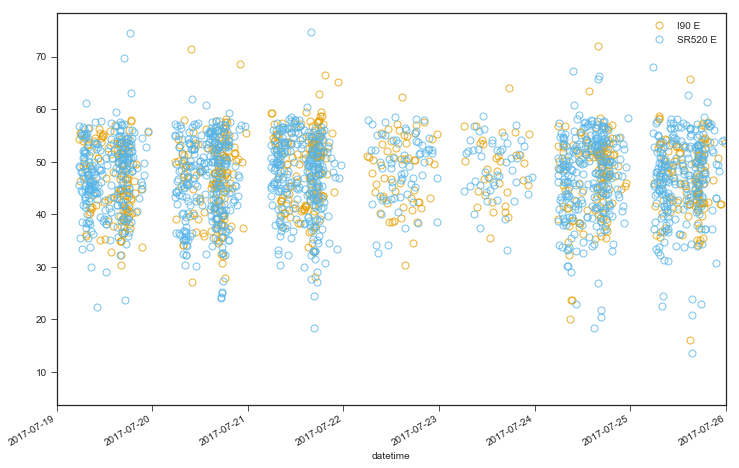

In [112]:
day=19
month=7
kwargs = {'lw':0, 'marker':'o', 'markersize':7, 'alpha':.8, 'mfc':'none'}
start=dt.date(2017,month,day)
end=dt.date(2017,month,day+7)
fig,ax = plt.subplots(figsize=(12,8))
df_WI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 W', **kwargs)
df_WSR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 W', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 W', 'SR520 W'])

fig,ax = plt.subplots(figsize=(12,8))
df_EI90.plot(ax=ax, x='datetime', y='simpleMPH', label='I90 E', **kwargs)
df_ESR520.plot(ax=ax, x='datetime', y='simpleMPH', label='SR520 E', **kwargs)
plt.xlim(start,end)
plt.legend(['I90 E', 'SR520 E'])

Now we play around with different ways of trying to summarize the data.
Here we're following PythonDataScienceHandbook: jakevdp.github.io/PythonDataScienceHandbook

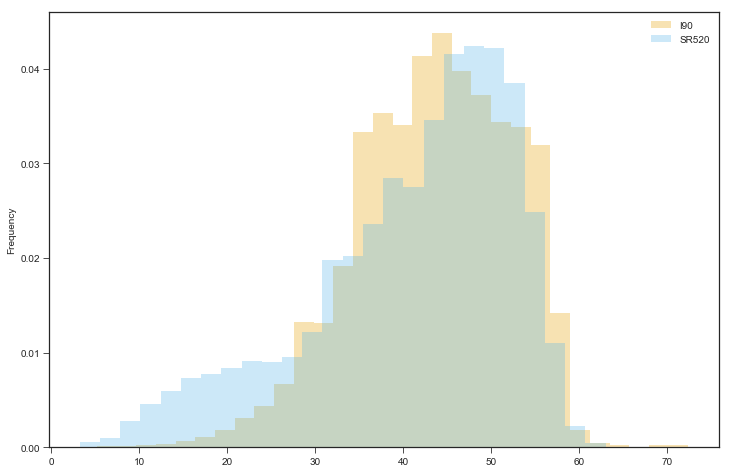

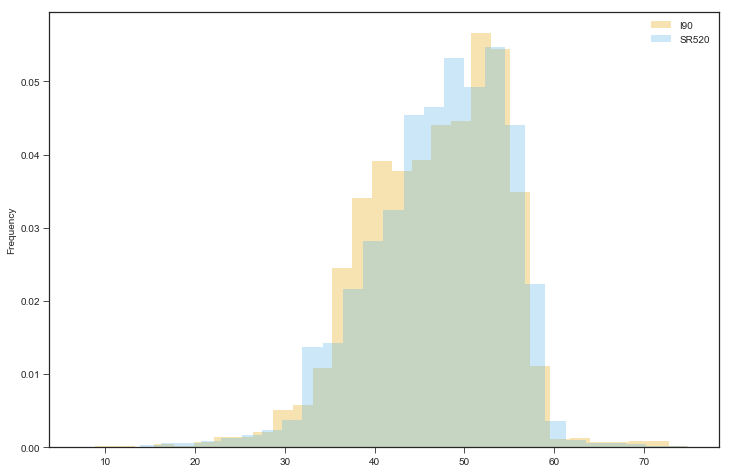

In [108]:
kind='hist'
options={'bins':30, 'normed':True, 'alpha':.3}
fig,ax = plt.subplots(figsize=(12,8))
df_WI90.plot(ax=ax, kind=kind, x='date', y='simpleMPH', label='I90', **options)
df_WSR520.plot(ax=ax, kind=kind, x='date', y='simpleMPH', label='SR520', **options)

fig,ax = plt.subplots(figsize=(12,8))
df_EI90.plot(ax=ax, kind=kind, x='date', y='simpleMPH', label='I90', **options)
df_ESR520.plot(ax=ax, kind=kind, x='date', y='simpleMPH', label='SR520', **options)


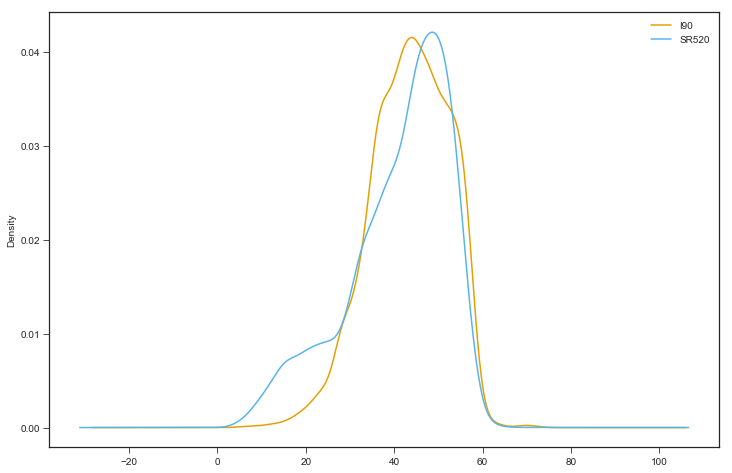

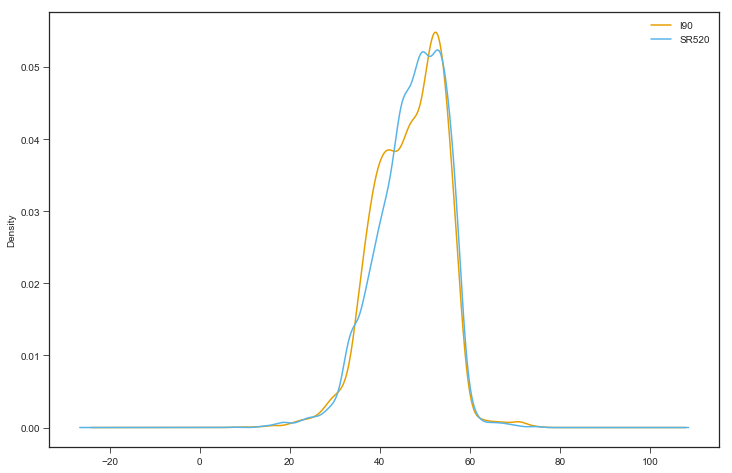

In [110]:
fig,ax = plt.subplots(figsize=(12,8))
df_WI90.plot(ax=ax, kind='kde', x='date', y='simpleMPH', label='I90')
df_WSR520.plot(ax=ax, kind='kde', x='date', y='simpleMPH', label='SR520' )

fig,ax = plt.subplots(figsize=(12,8))
df_EI90.plot(ax=ax, kind='kde', x='date', y='simpleMPH', label='I90')
df_ESR520.plot(ax=ax, kind='kde', x='date', y='simpleMPH', label='SR520')


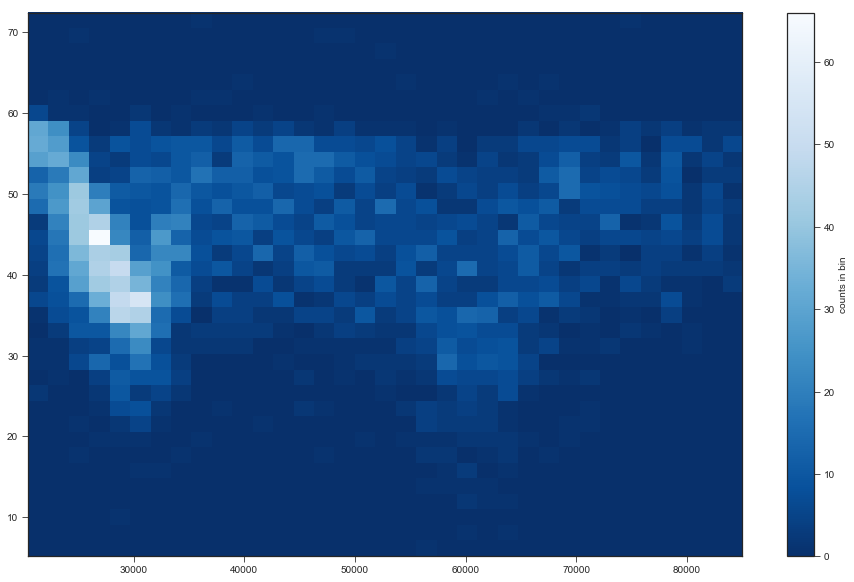

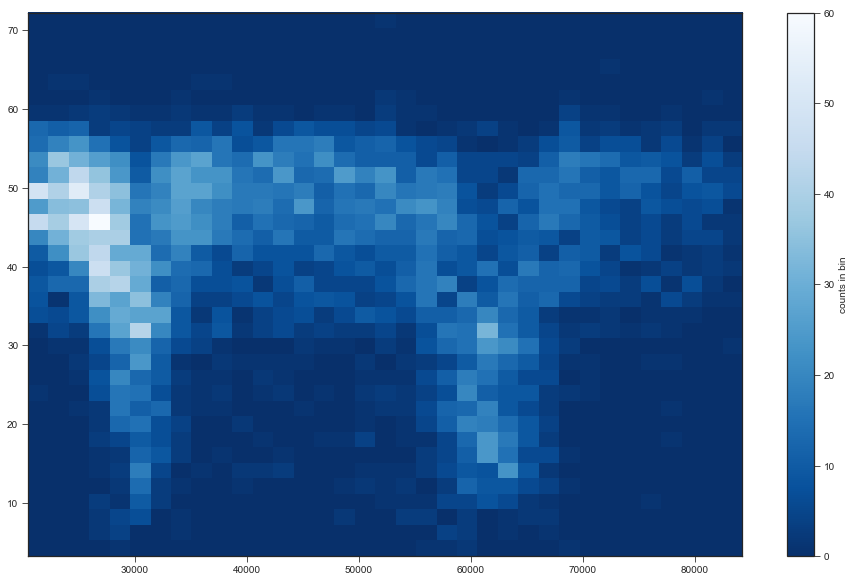

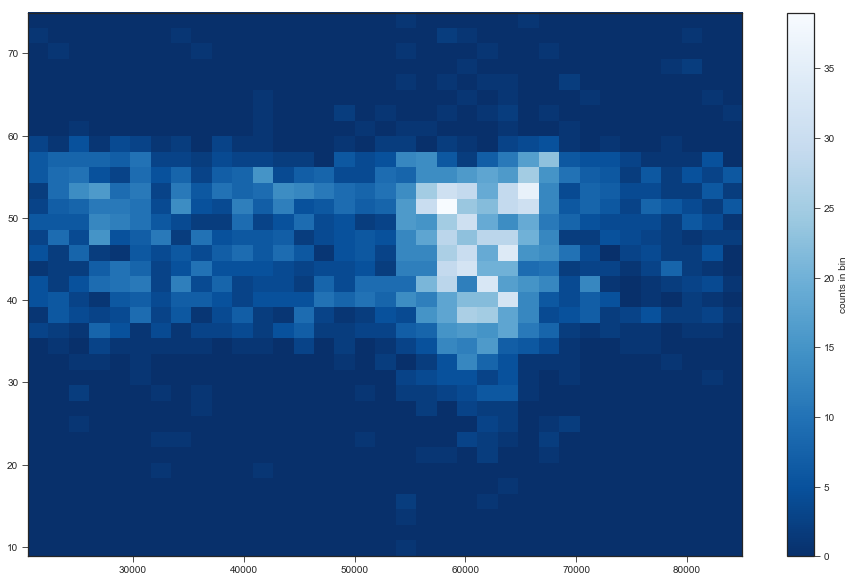

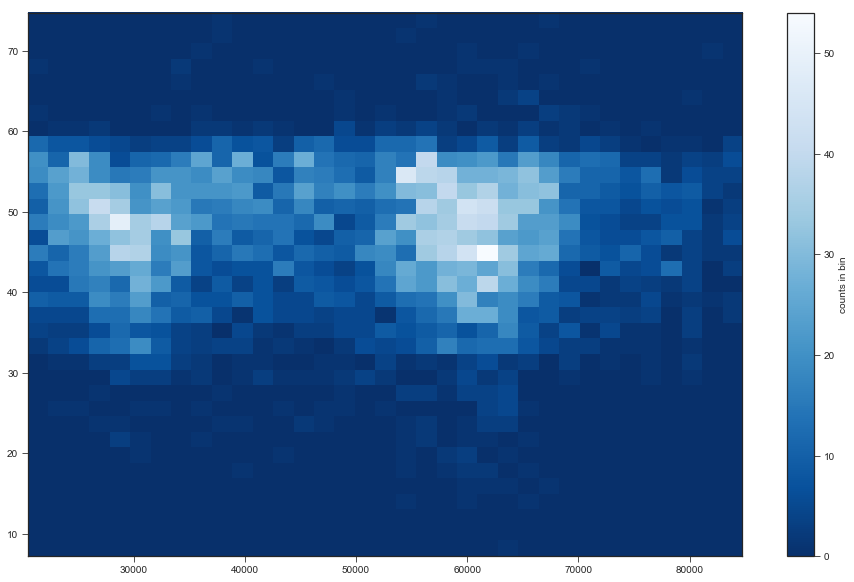

In [15]:

kwargs={'normed':False, 'alpha':1, 'cmap':'Blues_r', 'bins':35}
pltKwargs={'figsize':(16,10)}

fig,ax = plt.subplots(**pltKwargs)
plt.hist2d(df_WI90['timeofdaysec'], df_WI90['simpleMPH'], **kwargs)
cb = plt.colorbar()
cb.set_label('counts in bin')

fig,ax = plt.subplots(**pltKwargs)
plt.hist2d(df_WSR520['timeofdaysec'], df_WSR520['simpleMPH'], **kwargs)
cb = plt.colorbar()
cb.set_label('counts in bin')

fig,ax = plt.subplots(**pltKwargs)
plt.hist2d(df_EI90['timeofdaysec'], df_EI90['simpleMPH'], **kwargs)
cb = plt.colorbar()
cb.set_label('counts in bin')

fig,ax = plt.subplots(**pltKwargs)
plt.hist2d(df_ESR520['timeofdaysec'], df_ESR520['simpleMPH'], **kwargs)
cb = plt.colorbar()
cb.set_label('counts in bin')

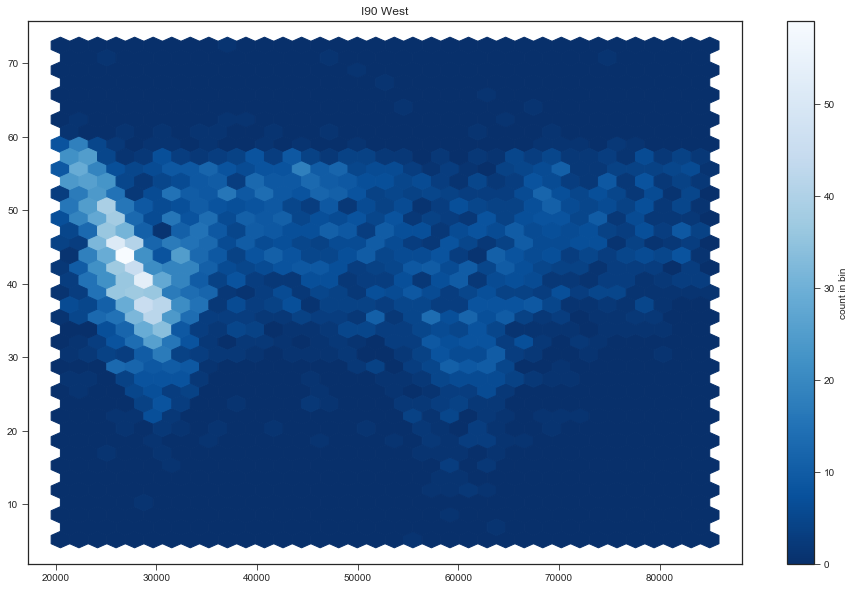

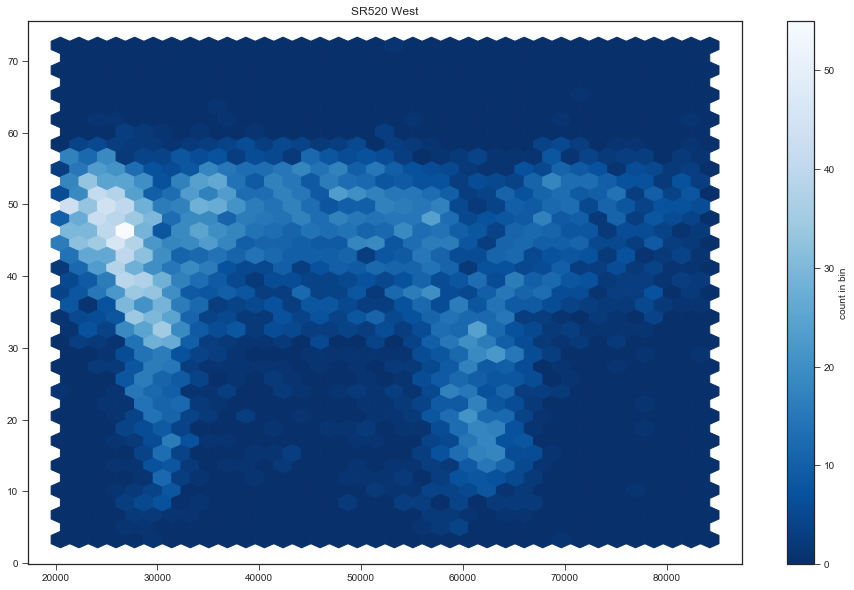

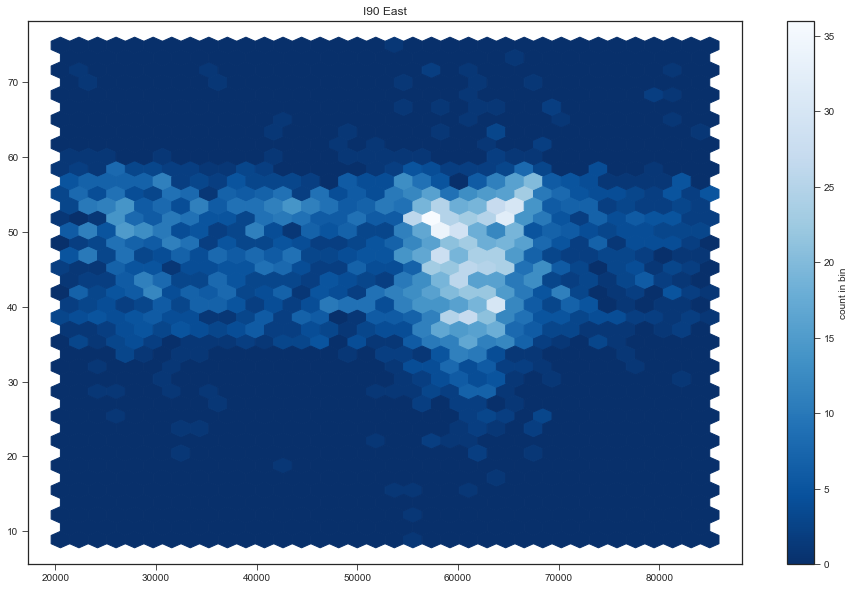

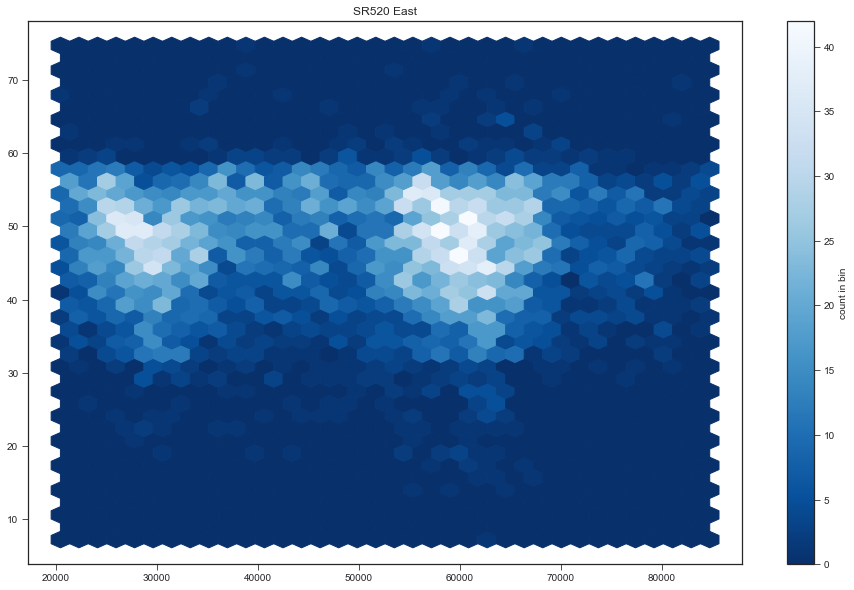

In [16]:
kwargs={'alpha':1, 'cmap':'Blues_r', 'gridsize':35, 'label':'counts in bin'}
pltKwargs={'figsize':(16,10)}

fig,ax = plt.subplots(**pltKwargs)
plt.hexbin(df_WI90['timeofdaysec'], df_WI90['simpleMPH'], **kwargs)
cb = plt.colorbar(label='count in bin')
plt.title('I90 West')

fig,ax = plt.subplots(**pltKwargs)
plt.hexbin(df_WSR520['timeofdaysec'], df_WSR520['simpleMPH'], **kwargs)
cb = plt.colorbar(label='count in bin')
plt.title('SR520 West')

fig,ax = plt.subplots(**pltKwargs)
plt.hexbin(df_EI90['timeofdaysec'], df_EI90['simpleMPH'], **kwargs)
cb = plt.colorbar(label='count in bin')
plt.title('I90 East')

fig,ax = plt.subplots(**pltKwargs)
plt.hexbin(df_ESR520['timeofdaysec'], df_ESR520['simpleMPH'], **kwargs)
cb = plt.colorbar(label='count in bin')
plt.title('SR520 East')


In [61]:
def smoothAnalysis( df, aText, bText, title,numGrid=200,):
    from scipy.stats import gaussian_kde
    pltKwargs={'figsize':(16,10)}
    fig,ax = plt.subplots(**pltKwargs)

    # fit an array of size [Ndim, Nsamples]
    data = np.vstack([df[aText], df[bText]])
    kde = gaussian_kde(data)

    # evaluate on a regular grid\
    xStart=0
    xEnd=90000
    yStart=0
    yEnd=75
    xgrid = np.linspace(xStart, xEnd, numGrid)
    ygrid = np.linspace(yStart, yEnd, numGrid)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    plt.title(title)
    # Plot the result as an image
    plt.imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[xStart, xEnd, yStart, yEnd],
               cmap='Blues_r')
    cb = plt.colorbar()
    cb.set_label("density")

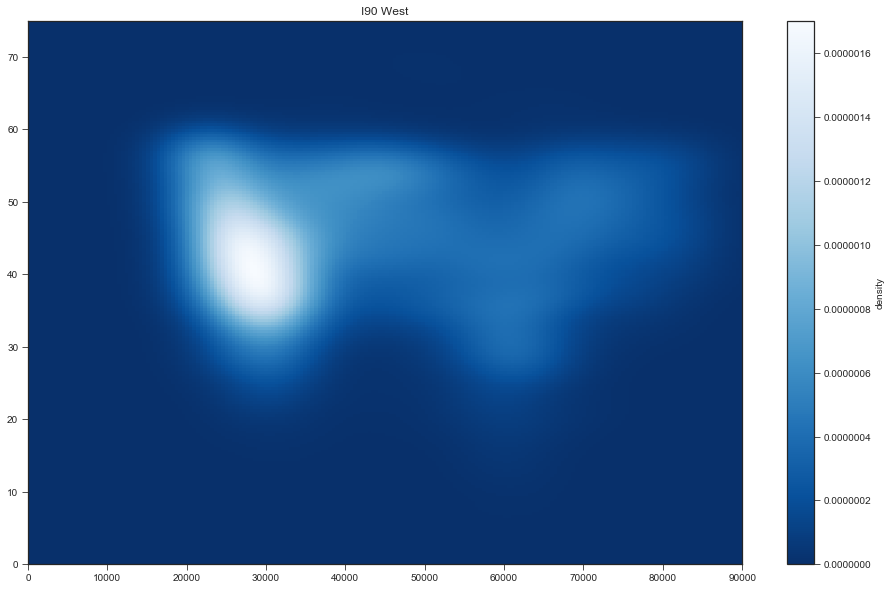

In [62]:
smoothAnalysis(df_WI90, 'timeofdaysec', 'simpleMPH', 'I90 West')


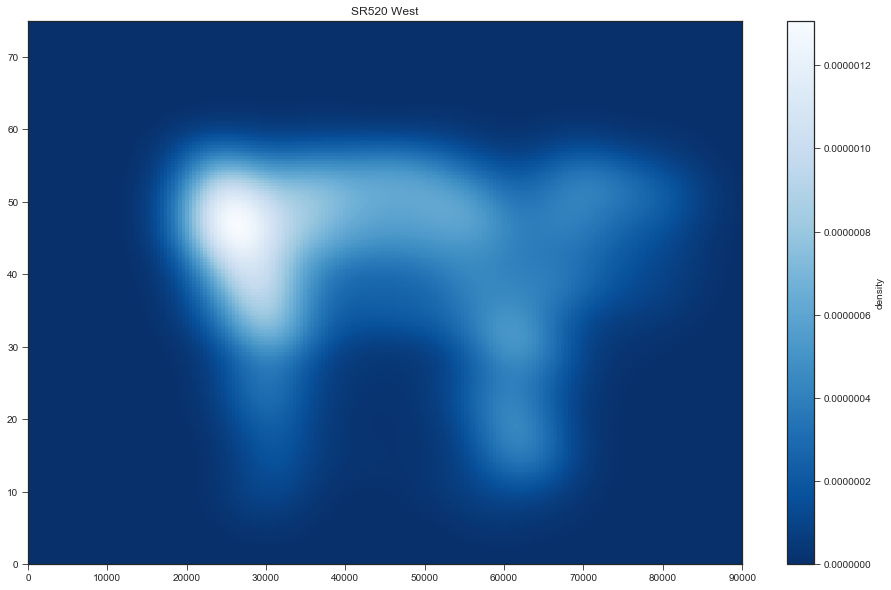

In [63]:
smoothAnalysis(df_WSR520, 'timeofdaysec', 'simpleMPH', 'SR520 West')


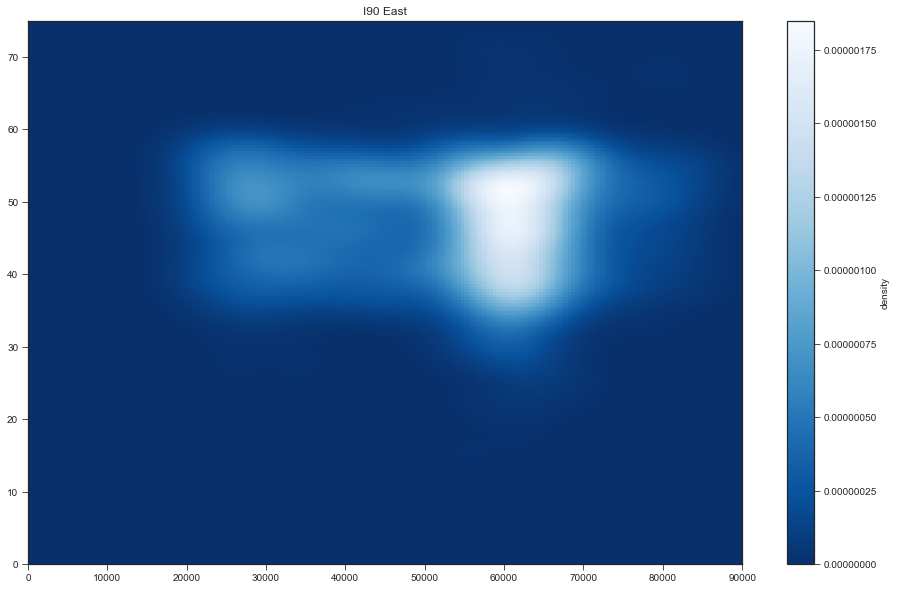

In [64]:
smoothAnalysis(df_EI90, 'timeofdaysec', 'simpleMPH', 'I90 East')


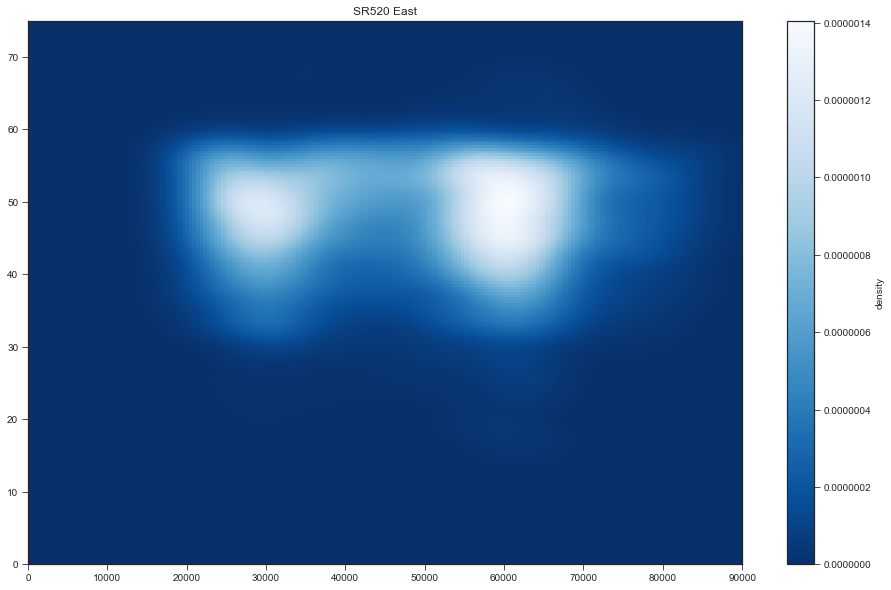

In [65]:
smoothAnalysis(df_ESR520, 'timeofdaysec', 'simpleMPH', 'SR520 East')
